In [4]:
import os
import pandas as pd
os.chdir("C:\\Users\\fmuhammad\\mcmc")

macro = pd.read_csv("macro-gdp-data.csv")
gdp = pd.read_csv("gva-gdp-data.csv")

In [5]:
all_data = pd.merge(gdp, macro, left_on = "Year", right_on = "Date", how = "outer")

In [1]:
macro

[]

In [6]:
all_data = all_data.iloc[:-1, :]

In [7]:
#[100 * (b - a) / a for a, b in zip(all_data.Manufacturing[::1], all_data.Manufacturing[1::1])][1:]

In [8]:
all_data["Public Administration"].pct_change() * 100

0          NaN
1     2.598622
2     5.777642
3     1.557842
4     0.776442
5     2.546275
6     1.200293
7     6.545948
8     1.792998
9     0.918274
10    2.994458
11    2.313067
12    2.409922
13    2.613828
14    2.181221
15    3.340887
16    1.888795
17    1.923210
18    2.391008
19    5.022953
20    6.828836
21    7.939991
22    5.339779
23    4.923077
24    3.290422
25    2.271306
26    0.159977
27    0.305351
28    2.969277
29    1.018830
Name: Public Administration, dtype: float64

In [9]:
all_data_pct = all_data.iloc[:, 1:].apply(lambda x: x.pct_change() * 100, axis = 0)

In [10]:
all_data_pct = pd.concat([all_data["Year"], all_data_pct], axis = 1).iloc[1:, :]

In [11]:
data_pct2 = pd.melt(all_data_pct, id_vars=['Year'], var_name = 'factor', value_name = 'pct')

In [12]:
set(data_pct2.factor)

{'Actual Oil Rents',
 'Agriculture',
 'CDS or yield data',
 'Construction',
 'Construction, Residential Building, Value-added output, real LCU - Annual (SAR bn)',
 'Consumer confidence index (world - monthly values averaged at yearly)',
 'Date',
 'Education',
 'Exports of goods and services (current US$)',
 'Financial Services',
 'GDP (GVA Sum)',
 'GDP (SAR bn)',
 'Global GDP',
 'Global Uncertainty Index',
 'Global Unemployment Rate',
 'GovConsumpExDef',
 'Gross fixed capital formation (current LCU)',
 'Healthcare',
 'Imports of goods and services (current US$)',
 'InbTourExp',
 'Inflation CPI (Annual growth rate)',
 'KSA GDP (Nominal - SAR bn)',
 'KSA Unemployment Rate',
 'Lending interest rate (%)',
 'M2 (% pa)',
 'Manufacturing',
 'Manufacturing, Value-added output, real LCU - Annual',
 'Net exports (current US$)',
 'No of Building Permits Issued: Commercial and Industrial (CEIC)',
 'OPTIONAL Dummy for Covid 19 global',
 'OPTIONAL Oil glut indicator of some sort. Dummy',
 'Oil & Gas

In [13]:
import numpy as np
def clean(serie):
    output = serie[(np.isnan(serie) == False) & (np.isinf(serie) == False)]
    return output

C:\Users\fmuhammad\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


factor
Agriculture              AxesSubplot(0.125,0.125;0.775x0.755)
Construction             AxesSubplot(0.125,0.125;0.775x0.755)
Education                AxesSubplot(0.125,0.125;0.775x0.755)
Financial Services       AxesSubplot(0.125,0.125;0.775x0.755)
GDP (GVA Sum)            AxesSubplot(0.125,0.125;0.775x0.755)
GDP (SAR bn)             AxesSubplot(0.125,0.125;0.775x0.755)
Healthcare               AxesSubplot(0.125,0.125;0.775x0.755)
Manufacturing            AxesSubplot(0.125,0.125;0.775x0.755)
Oil & Gas                AxesSubplot(0.125,0.125;0.775x0.755)
Public Administration    AxesSubplot(0.125,0.125;0.775x0.755)
Public Services          AxesSubplot(0.125,0.125;0.775x0.755)
Real Estate              AxesSubplot(0.125,0.125;0.775x0.755)
Real GDP (SAR bn)        AxesSubplot(0.125,0.125;0.775x0.755)
Restaurants & Hotels     AxesSubplot(0.125,0.125;0.775x0.755)
Retail Trade             AxesSubplot(0.125,0.125;0.775x0.755)
Utilities                AxesSubplot(0.125,0.125;0.775x0.755)
W

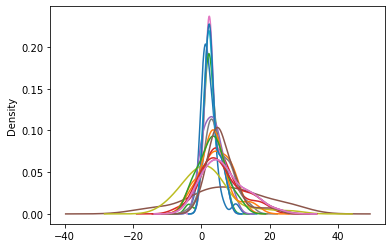

In [14]:
gdp_pct = data_pct2[data_pct2.factor.isin(gdp.columns)]
gdp_pct.pct = clean(gdp_pct.pct)
gdp_pct.groupby(["factor"]).pct.plot.kde()

C:\Users\fmuhammad\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\fmuhammad\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:119: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
C:\Users\fmuhammad\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:121: RuntimeWarning: All-NaN slice encountered
  np.nanmin(y) - 0.5 * sample_range,
C:\Users\fmuhammad\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:122: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range,


ValueError: `dataset` input should have multiple elements.

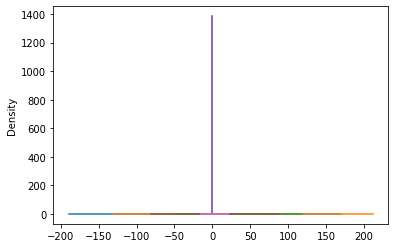

In [15]:
macro_pct = data_pct2[data_pct2.factor.isin(macro.columns)]
macro_pct.pct = clean(macro_pct.pct)
macro_pct.groupby(["factor"]).pct.plot.kde()

In [16]:
import seaborn as sns
# Create the default pairplot
#sns.pairplot(all_data_pct.iloc[:, :10])

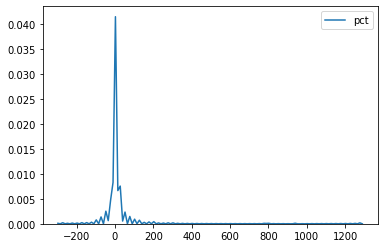

In [17]:
sns.kdeplot(macro_pct.pct)

Year
1991.0    AxesSubplot(0.125,0.125;0.775x0.755)
1992.0    AxesSubplot(0.125,0.125;0.775x0.755)
1993.0    AxesSubplot(0.125,0.125;0.775x0.755)
1994.0    AxesSubplot(0.125,0.125;0.775x0.755)
1995.0    AxesSubplot(0.125,0.125;0.775x0.755)
1996.0    AxesSubplot(0.125,0.125;0.775x0.755)
1997.0    AxesSubplot(0.125,0.125;0.775x0.755)
1998.0    AxesSubplot(0.125,0.125;0.775x0.755)
1999.0    AxesSubplot(0.125,0.125;0.775x0.755)
2000.0    AxesSubplot(0.125,0.125;0.775x0.755)
2001.0    AxesSubplot(0.125,0.125;0.775x0.755)
2002.0    AxesSubplot(0.125,0.125;0.775x0.755)
2003.0    AxesSubplot(0.125,0.125;0.775x0.755)
2004.0    AxesSubplot(0.125,0.125;0.775x0.755)
2005.0    AxesSubplot(0.125,0.125;0.775x0.755)
2006.0    AxesSubplot(0.125,0.125;0.775x0.755)
2007.0    AxesSubplot(0.125,0.125;0.775x0.755)
2008.0    AxesSubplot(0.125,0.125;0.775x0.755)
2009.0    AxesSubplot(0.125,0.125;0.775x0.755)
2010.0    AxesSubplot(0.125,0.125;0.775x0.755)
2011.0    AxesSubplot(0.125,0.125;0.775x0.755)
2012.0  

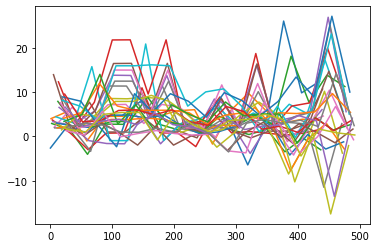

In [18]:
gdp_pct.groupby(["Year"]).pct.plot()

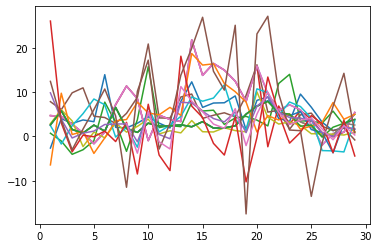

In [19]:
gdp.iloc[:, 1:].apply(lambda x: x.pct_change() * 100, axis = 0).plot(legend = False)

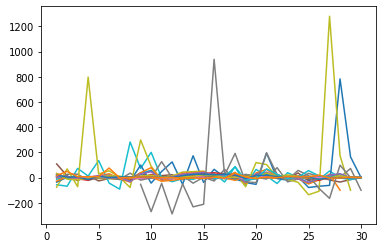

In [20]:
macro.iloc[:, 1:].apply(lambda x: x.pct_change() * 100, axis = 0).plot(legend = False)

In [21]:
gdp.iloc[:, 1:].apply(lambda x: x.pct_change() * 100, axis = 0).describe()

,Manufacturing,Public Administration,Real Estate,Restaurants & Hotels,Retail Trade,Utilities,Wholesale Trade,Public Services,Agriculture,Construction,Education,Financial Services,Healthcare,Oil & Gas,GDP (GVA Sum),GDP (SAR bn),Real GDP (SAR bn)
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,23.000000
mean,4.928902,2.960018,3.841703,6.122638,6.546590,6.200773,6.546590,3.013483,2.055034,4.078542,2.994098,5.389573,3.086606,1.878658,3.447804,7.409068,inf
std,3.674281,2.012291,4.567557,6.087841,5.971468,4.446597,5.971468,1.979919,2.251927,4.376181,2.333028,5.580326,1.938625,7.627399,2.924861,11.442946,NaN
min,-2.609616,0.159977,-4.025192,-2.321020,-1.946683,-0.787608,-1.946683,0.159976,-2.289708,-3.484868,-3.691358,-6.406571,-0.164609,-10.230488,-1.203337,-17.448852,-3.763402
25%,2.096269,1.792998,2.202158,0.993789,2.651676,4.136573,2.651676,1.886195,0.805048,1.550756,1.801596,2.344382,1.931784,-3.463983,0.869203,1.299318,1.000995
50%,3.720406,2.409922,3.441595,4.709141,5.399801,5.203406,5.399801,2.551492,1.278096,4.134185,2.546646,4.733193,2.573529,0.909107,3.283407,6.768217,2.893370
75%,7.589058,3.340887,5.704967,8.556701,9.627433,8.812950,9.627433,3.342491,3.038471,7.761852,4.670022,7.718762,3.843137,4.396968,5.511784,14.222756,5.599716
max,13.917526,7.939991,15.725699,21.739130,21.765135,20.826446,21.765135,7.936971,10.033249,11.612263,8.052196,18.681635,7.886598,25.990208,9.822526,27.078727,inf


In [89]:
#!pip install pymc3

In [22]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\fmuhammad\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


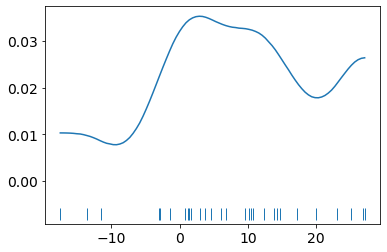

In [23]:
az.plot_kde(gdp["GDP (SAR bn)"].pct_change() * 100, rug=True)

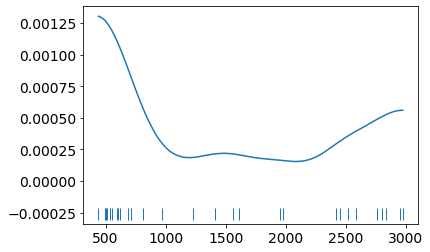

In [24]:
az.plot_kde(clean(gdp["GDP (SAR bn)"]), rug=True)

In [25]:
max(gdp["GDP (SAR bn)"])

2973.63

## Model on Nominal GDP Value

In [242]:
with pm.Model() as model_gdp:
    mu = pm.Uniform('μ', lower=min(gdp["GDP (SAR bn)"]), upper=max(gdp["GDP (SAR bn)"]))
    si = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=mu, sd=si, observed=gdp["GDP (SAR bn)"].values)
    trace_gdp = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████████| 4000/4000 [01:00<00:00, 66.48draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC1A7C7D08>,
      dtype=object)

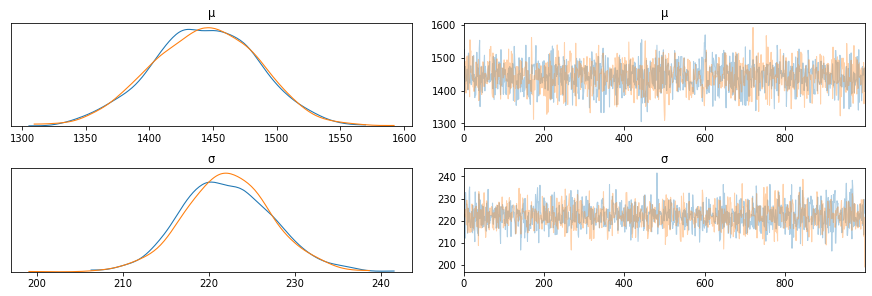

In [243]:
az.plot_trace(trace_gdp)

## Model on Nominal GDP %

In [26]:
gdp_data_pct = gdp.iloc[:, 1:].apply(lambda x: x.pct_change() * 100, axis = 0).iloc[1:, :]
gdp_data_pct["GDP (SAR bn)"] = clean(gdp_data_pct["GDP (SAR bn)"].fillna(gdp_data_pct["GDP (SAR bn)"].mode()))
gdp_data_pct = gdp_data_pct.dropna()
gdp_data_pct

,Manufacturing,Public Administration,Real Estate,Restaurants & Hotels,Retail Trade,Utilities,Wholesale Trade,Public Services,Agriculture,Construction,Education,Financial Services,Healthcare,Oil & Gas,GDP (GVA Sum),GDP (SAR bn),Real GDP (SAR bn)
7,2.059285,6.545948,3.169354,7.134071,7.222573,2.921130,7.222573,6.549741,3.038471,-0.145560,6.535471,3.531828,6.532861,-1.146764,2.809608,4.601222,inf
8,1.927253,1.792998,-3.352478,11.366246,11.351139,5.203406,11.351139,1.794336,0.975030,2.024619,1.801596,3.808013,1.810122,3.175958,2.824342,-11.442730,2.893370
9,2.982690,0.918274,3.786622,8.556701,8.483245,8.812950,8.483245,0.914964,2.260951,-2.413081,0.918459,7.718762,0.907112,-8.449658,-1.203337,10.179684,-3.763402
10,4.430653,2.994458,15.725699,-0.949668,-0.926679,20.826446,-0.926679,2.997558,3.915246,6.669920,2.996670,5.285562,2.984538,7.252926,5.179586,17.188840,5.625580
11,3.004540,2.313067,1.990565,4.793864,4.808008,4.172367,4.808008,2.317476,0.576241,1.021809,2.306034,4.885445,2.339385,-4.184941,0.447050,-2.836720,-1.210894
12,1.923231,2.409922,2.459386,3.842635,3.820260,4.136573,3.820260,2.408962,1.278096,2.536232,2.401517,6.553164,2.388263,-7.689186,-0.521317,2.968777,-2.819478
13,7.901565,2.613828,2.202158,3.348018,3.378073,8.890290,3.378073,2.606042,0.805048,4.534747,2.612631,4.733193,2.632456,18.076115,7.694184,13.819583,11.242547
14,12.299621,2.181221,7.692308,21.739130,21.765135,9.554140,21.765135,2.182268,3.582992,8.901408,2.185245,18.681635,2.175325,6.833133,7.556021,19.894227,7.958519
15,6.546847,3.340887,5.732293,13.795518,13.741464,4.069767,13.741464,3.342491,1.062721,7.941024,3.335295,16.080524,3.336511,4.264054,5.675747,26.846890,5.573852
16,7.526947,1.888795,5.913521,16.430769,16.463029,4.773997,16.463029,1.886195,1.010309,8.650851,1.898614,16.360217,1.875769,-1.558234,4.034728,14.683491,2.787968


In [245]:
with pm.Model() as model_gdp_pct:
    mu = pm.Uniform('μ', lower=min(gdp_data_pct["GDP (SAR bn)"]), upper=max(gdp_data_pct["GDP (SAR bn)"]))
    si = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=mu, sd=si, observed=gdp_data_pct["GDP (SAR bn)"].values)
    trace_gdp_pct = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains, 0 divergences: 100%|██████████████████████████████████████| 12000/12000 [01:47<00:00, 112.05draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC51397B08>,
      dtype=object)

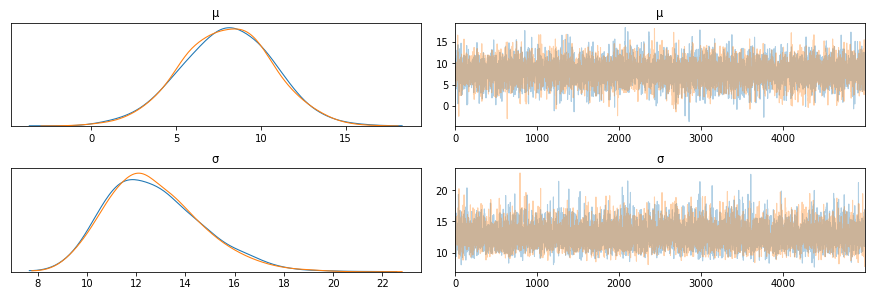

In [246]:
az.plot_trace(trace_gdp_pct)

### Should not be any collinearity in the model

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC1B6BC208>,
      dtype=object)

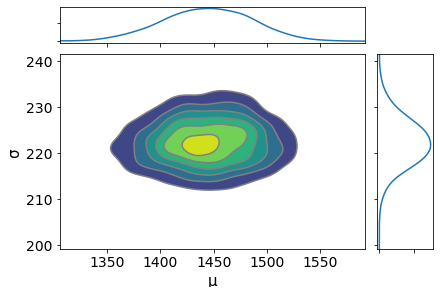

In [247]:
az.plot_joint(trace_gdp, kind = 'kde', fill_last = False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC44F27A08>,
      dtype=object)

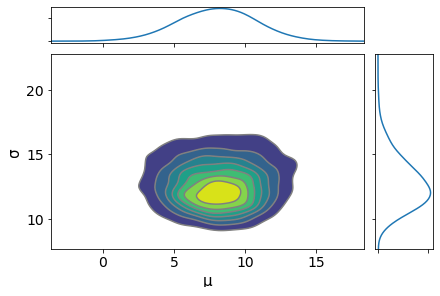

In [248]:
az.plot_joint(trace_gdp_pct, kind = 'kde', fill_last = False)

### Posterior mean and sd (%)

In [249]:
az.summary(trace_gdp_pct)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ,8.002,2.753,2.770,13.144,0.033,0.024,6781.0,6781.0,6938.0,5479.0,1.0
σ,12.751,1.917,9.275,16.268,0.023,0.017,6693.0,6449.0,6937.0,6209.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC51C9D848>,
      dtype=object)

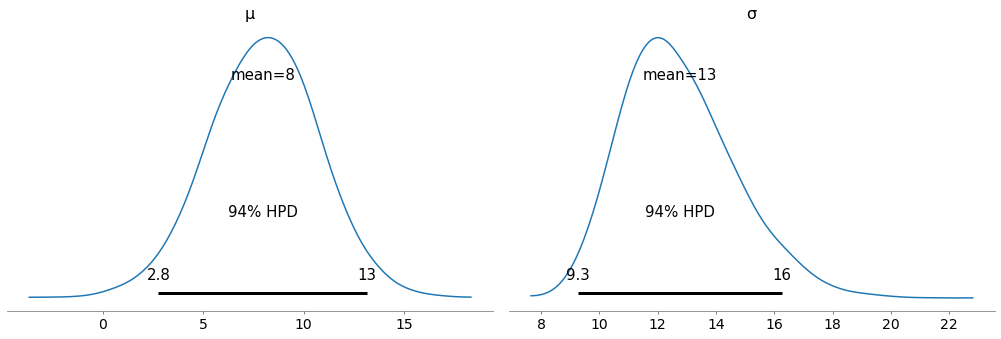

In [250]:
az.plot_posterior(trace_gdp_pct)

### Posterior mean and sd (value)

       mean      sd    hpd_3%   hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
μ  1443.350  41.493  1368.896  1523.482      0.940    0.666    1949.0  1939.0   
σ   222.193   5.076   213.602   232.741      0.118    0.083    1865.0  1862.0   

   ess_bulk  ess_tail  r_hat  
μ    1945.0    1414.0   1.00  
σ    1872.0    1563.0   1.01  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC4FC0D788>,
      dtype=object)

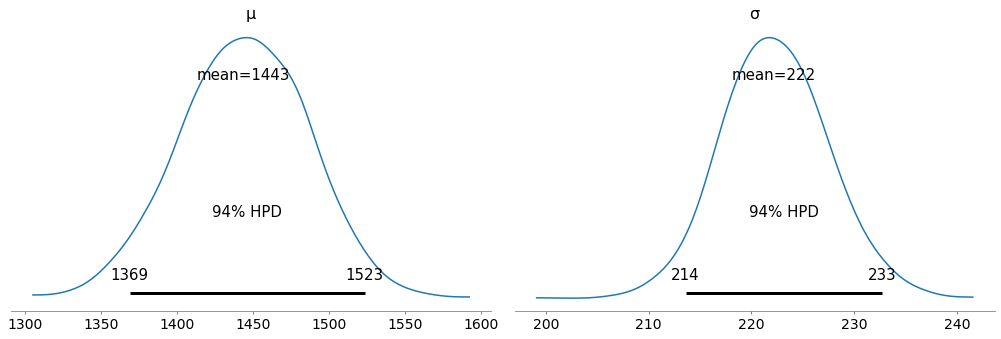

In [251]:
print(az.summary(trace_gdp))
az.plot_posterior(trace_gdp)

### Gelman Rubin test for convergence should be closer to 1

In [252]:
print(pm.rhat(trace_gdp))
print(pm.rhat(trace_gdp_pct))

<xarray.Dataset>
Dimensions:  ()
Data variables:
    μ        float64 0.9995
    σ        float64 1.005
<xarray.Dataset>
Dimensions:  ()
Data variables:
    μ        float64 1.0
    σ        float64 1.001


### Posterior mean prediction using the model (value)

In [256]:
ppc_gdp = pm.sample_posterior_predictive(trace_gdp, samples=1000, model=model_gdp)
print(np.asarray(ppc_gdp['y']).shape)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 654.40it/s]

(1000, 30)


1442.8433333333335


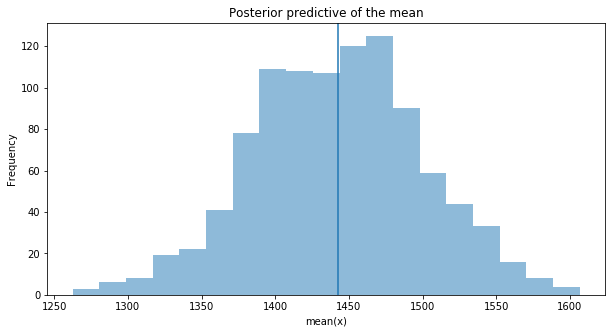

In [257]:
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc_gdp['y']], bins=19, alpha=0.5)
ax.axvline(gdp["GDP (SAR bn)"].mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
print(gdp["GDP (SAR bn)"].mean())

### Posterior mean prediction (%)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:08<00:00, 600.37it/s]


(5000, 23)
7.973696919330669


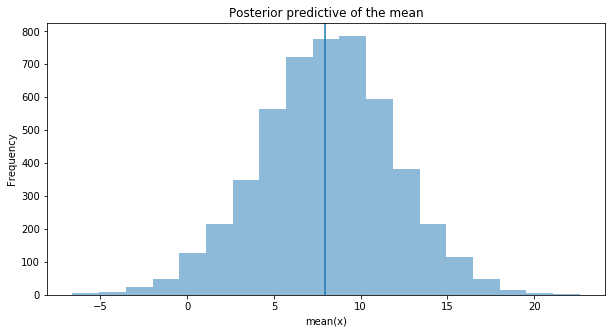

In [258]:
ppc_gdp_pct = pm.sample_posterior_predictive(trace_gdp_pct, samples=5000, model=model_gdp_pct)
print(np.asarray(ppc_gdp_pct['y']).shape)
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc_gdp_pct['y']], bins=19, alpha=0.5)
ax.axvline(gdp_data_pct["GDP (SAR bn)"].mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
print(gdp_data_pct["GDP (SAR bn)"].mean())

In [149]:
#factor_mean = gdp_pct.groupby(["factor"], as_index = False).agg({"pct": "mean"})
#factor_mean

,factor,pct
0,Agriculture,2.055034
1,Construction,4.078542
2,Education,2.994098
3,Financial Services,5.389573
4,GDP (GVA Sum),3.447804
5,GDP (SAR bn),7.409068
6,Healthcare,3.086606
7,Manufacturing,4.928902
8,Oil & Gas,1.878658
9,Public Administration,2.960018


## Getting percentage changes for all variables and getting data into long shape for the model

In [27]:
gdp.iloc[:, 1:] = gdp.iloc[:, 1:].apply(lambda x: x.pct_change() * 100, axis = 0)
gdp_pct2 = pd.melt(gdp, id_vars=["Year", "GDP (SAR bn)"], var_name = 'factor', value_name = 'pct')
gdp_pct2

,Year,GDP (SAR bn),factor,pct
0,1990,NaN,Manufacturing,NaN
1,1991,12.405512,Manufacturing,-2.609616
2,1992,3.677451,Manufacturing,4.019312
3,1993,-3.005512,Manufacturing,2.924112
4,1994,1.660776,Manufacturing,3.720406
...,...,...,...,...
475,2015,-13.496409,Real GDP (SAR bn),4.106608
476,2016,-1.426528,Real GDP (SAR bn),1.670569
477,2017,6.768217,Real GDP (SAR bn),-0.741568
478,2018,14.222756,Real GDP (SAR bn),2.434039


In [28]:
gdp_pct2.iloc[:, 1] = gdp_pct2.iloc[:, 1].fillna(gdp_pct2.iloc[:, 1].mode())
gdp_pct2 = gdp_pct2.dropna()
gdp_pct2

,Year,GDP (SAR bn),factor,pct
1,1991,12.405512,Manufacturing,-2.609616
2,1992,3.677451,Manufacturing,4.019312
3,1993,-3.005512,Manufacturing,2.924112
4,1994,1.660776,Manufacturing,3.720406
5,1995,6.042708,Manufacturing,3.326087
...,...,...,...,...
475,2015,-13.496409,Real GDP (SAR bn),4.106608
476,2016,-1.426528,Real GDP (SAR bn),1.670569
477,2017,6.768217,Real GDP (SAR bn),-0.741568
478,2018,14.222756,Real GDP (SAR bn),2.434039


In [29]:
list1 = gdp_pct2["GDP (SAR bn)"].values
mx=max(list1[0],list1[1])  
secondmax=min(list1[0],list1[1])  
n =len(list1) 
for i in range(2,n):  
    if list1[i]>mx:  
        secondmax=mx 
        mx=list1[i]  
    elif list1[i]>secondmax and mx != list1[i]:  
        secondmax=list1[i] 
    else: 
        if secondmax == mx: 
            secondmax = list1[i] 
print("Second highest number is : ",str(secondmax)) 
print(secondmax)
print(max(list1))

Second highest number is :  26.846889557653462
26.846889557653462
27.078726562263356


In [269]:
gdp_pct2.iloc[:, 1][np.isinf(gdp_pct2.iloc[:, 1])] = max(list1) #secondmax

C:\Users\fmuhammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
gdp_pct2.describe()

,Year,GDP (SAR bn),pct
count,458.000000,458.000000,458.000000
mean,2005.150655,7.437423,inf
std,8.323151,11.311020,NaN
min,1991.000000,-17.448852,-10.230488
25%,1998.000000,1.299318,1.552062
50%,2005.000000,6.768217,3.286915
75%,2012.000000,14.222756,5.909068
max,2019.000000,27.078727,inf


#### Attributes and their numeric codes

In [31]:
from pprint import pprint
real_gdp = gdp_pct2["GDP (SAR bn)"].values
factors = gdp_pct2.factor.nunique()
indices = pd.Categorical(gdp_pct2.factor).codes
pprint(dict(zip(gdp_pct2.factor, indices)))
print(indices)

{'Agriculture': 0,
 'Construction': 1,
 'Education': 2,
 'Financial Services': 3,
 'GDP (GVA Sum)': 4,
 'Healthcare': 5,
 'Manufacturing': 6,
 'Oil & Gas': 7,
 'Public Administration': 8,
 'Public Services': 9,
 'Real Estate': 10,
 'Real GDP (SAR bn)': 11,
 'Restaurants & Hotels': 12,
 'Retail Trade': 13,
 'Utilities': 14,
 'Wholesale Trade': 15}
[ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15  9  9  9  9  9  9  9  9  9  9  9 

In [279]:
with pm.Model() as model_condition:
    mu = pm.Normal('μ', mu=0, sd=10, shape=factors)
    si = pm.HalfNormal('σ', sd=10, shape=factors)
    y = pm.Normal('y', mu=mu[indices], sd=si[indices], observed=real_gdp)
    trace_factors = pm.sample(1500, tune=1500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains, 0 divergences: 100%|███████████████████████████████████████| 6000/6000 [1:00:43<00:00,  1.65draws/s]


In [280]:
factor_eff = az.from_pymc3(trace=trace_factors)
fct_summary = az.summary(factor_eff)
fct_summary

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ[0],7.088,2.096,3.321,11.132,0.027,0.019,6153.0,6110.0,6282.0,2199.0,1.00
μ[1],7.076,2.156,3.166,11.245,0.027,0.019,6467.0,6327.0,6414.0,1985.0,1.00
μ[2],7.073,2.134,2.891,10.881,0.026,0.021,6592.0,5292.0,6613.0,2286.0,1.00
μ[3],7.108,2.104,3.003,10.965,0.026,0.020,6795.0,5777.0,6793.0,2387.0,1.00
μ[4],7.079,2.076,2.872,10.714,0.025,0.018,7162.0,6644.0,7311.0,2240.0,1.01
μ[5],7.060,2.114,3.156,10.986,0.029,0.021,5415.0,4993.0,5439.0,2226.0,1.00
μ[6],7.084,2.071,3.287,10.999,0.028,0.020,5622.0,5216.0,5624.0,2211.0,1.00
μ[7],7.087,2.091,3.000,10.811,0.029,0.023,5132.0,4302.0,5165.0,1892.0,1.00
μ[8],7.043,2.067,3.054,10.928,0.026,0.020,6138.0,5303.0,6346.0,1923.0,1.00
μ[9],7.063,2.141,2.909,10.854,0.027,0.019,6207.0,6207.0,6306.0,1780.0,1.00


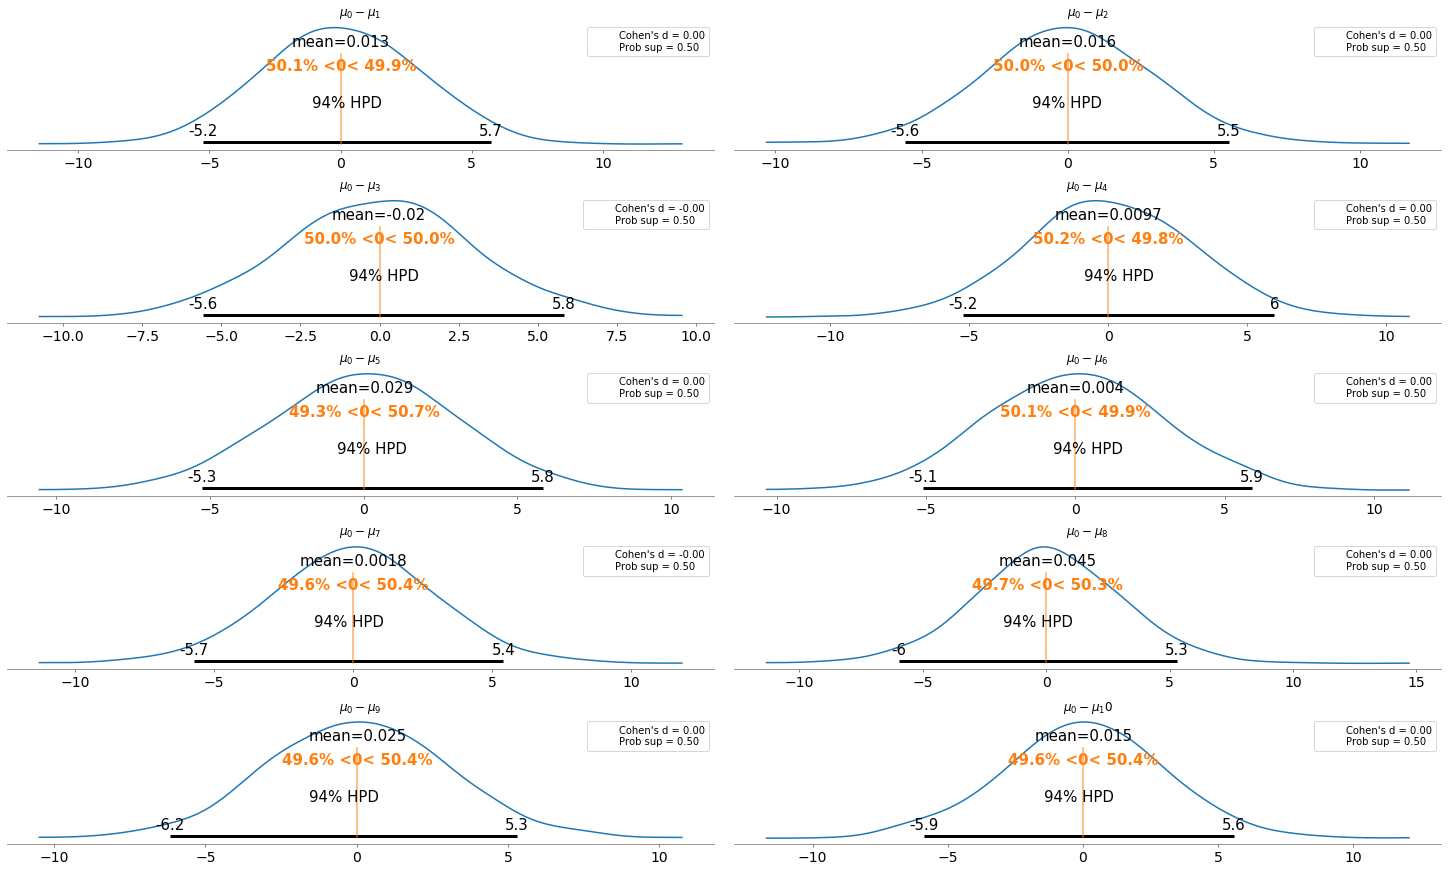

In [281]:
dist = stats.norm()

_, ax = plt.subplots(5, 2, figsize=(20, 12), constrained_layout=True)

comparisons = [(i, j) for i in range(16) for j in range(i+1, 16)]
pos = [(k, l) for k in range(5) for l in (0, 1)]

for (i, j), (k, l) in zip(comparisons, pos):
    means_diff = trace_factors['μ'][:, i] - trace_factors['μ'][:, j]
    d_cohen = (means_diff / np.sqrt((trace_factors['σ'][:, i]**2 + trace_factors['σ'][:, j]**2) / 2)).mean()
    ps = dist.cdf(d_cohen/(2**0.5))
    az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l])
    ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
    ax[k, l].plot(
        0, label=f"Cohen's d = {d_cohen:.2f}\nProb sup = {ps:.2f}", alpha=0)
    ax[k, l].legend();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC4F977808>,
      dtype=object)

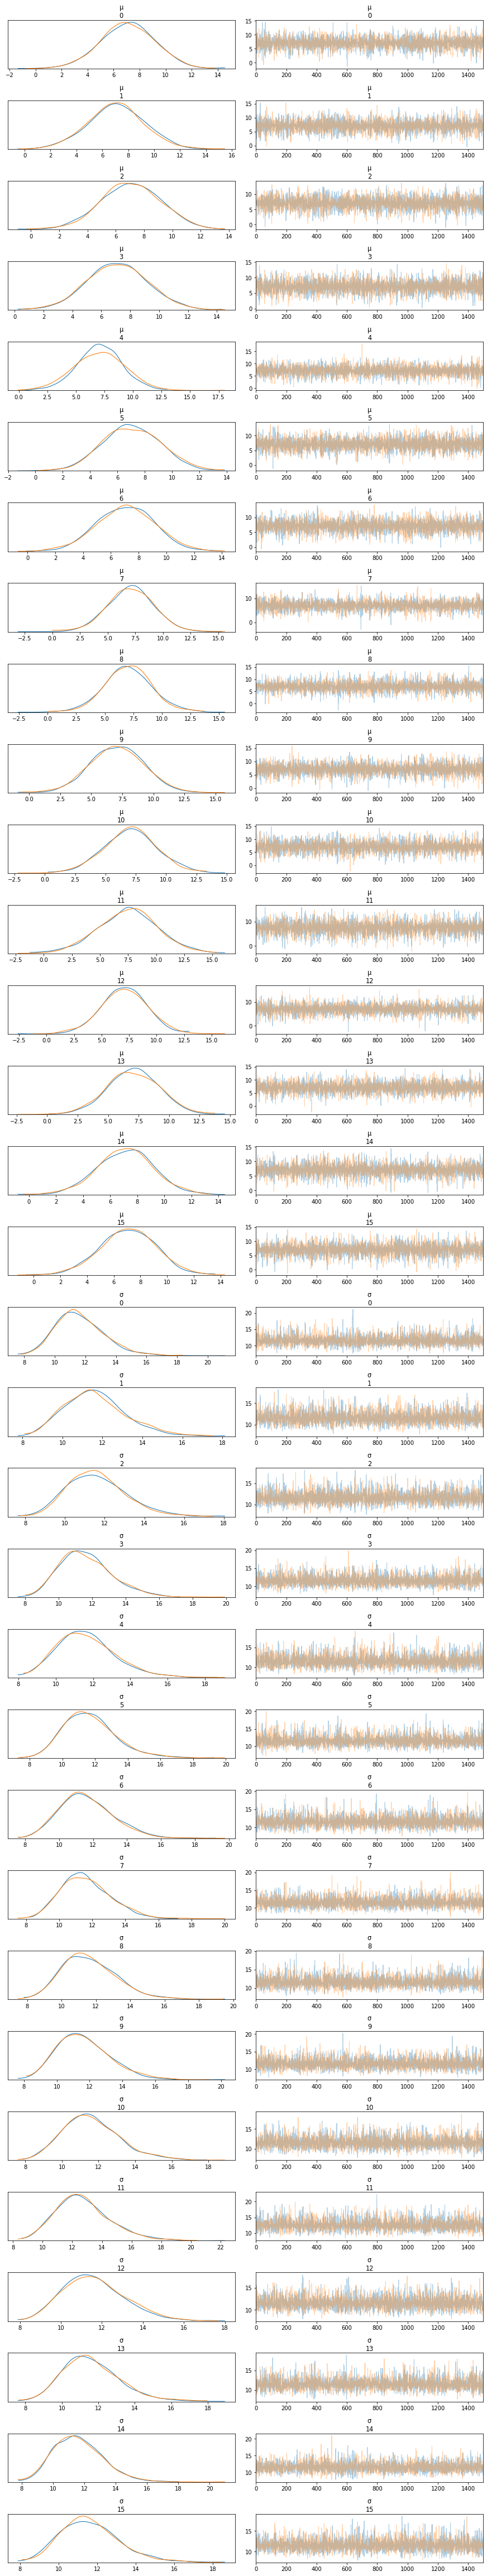

In [282]:
az.plot_trace(trace_factors)

         mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
μ[0]    7.088  2.096   3.321   11.132      0.027    0.019    6153.0  6110.0   
μ[1]    7.076  2.156   3.166   11.245      0.027    0.019    6467.0  6327.0   
μ[2]    7.073  2.134   2.891   10.881      0.026    0.021    6592.0  5292.0   
μ[3]    7.108  2.104   3.003   10.965      0.026    0.020    6795.0  5777.0   
μ[4]    7.079  2.076   2.872   10.714      0.025    0.018    7162.0  6644.0   
μ[5]    7.060  2.114   3.156   10.986      0.029    0.021    5415.0  4993.0   
μ[6]    7.084  2.071   3.287   10.999      0.028    0.020    5622.0  5216.0   
μ[7]    7.087  2.091   3.000   10.811      0.029    0.023    5132.0  4302.0   
μ[8]    7.043  2.067   3.054   10.928      0.026    0.020    6138.0  5303.0   
μ[9]    7.063  2.141   2.909   10.854      0.027    0.019    6207.0  6207.0   
μ[10]   7.073  2.187   2.851   11.135      0.027    0.021    6669.0  5584.0   
μ[11]   7.489  2.686   2.155   12.392      0.033    

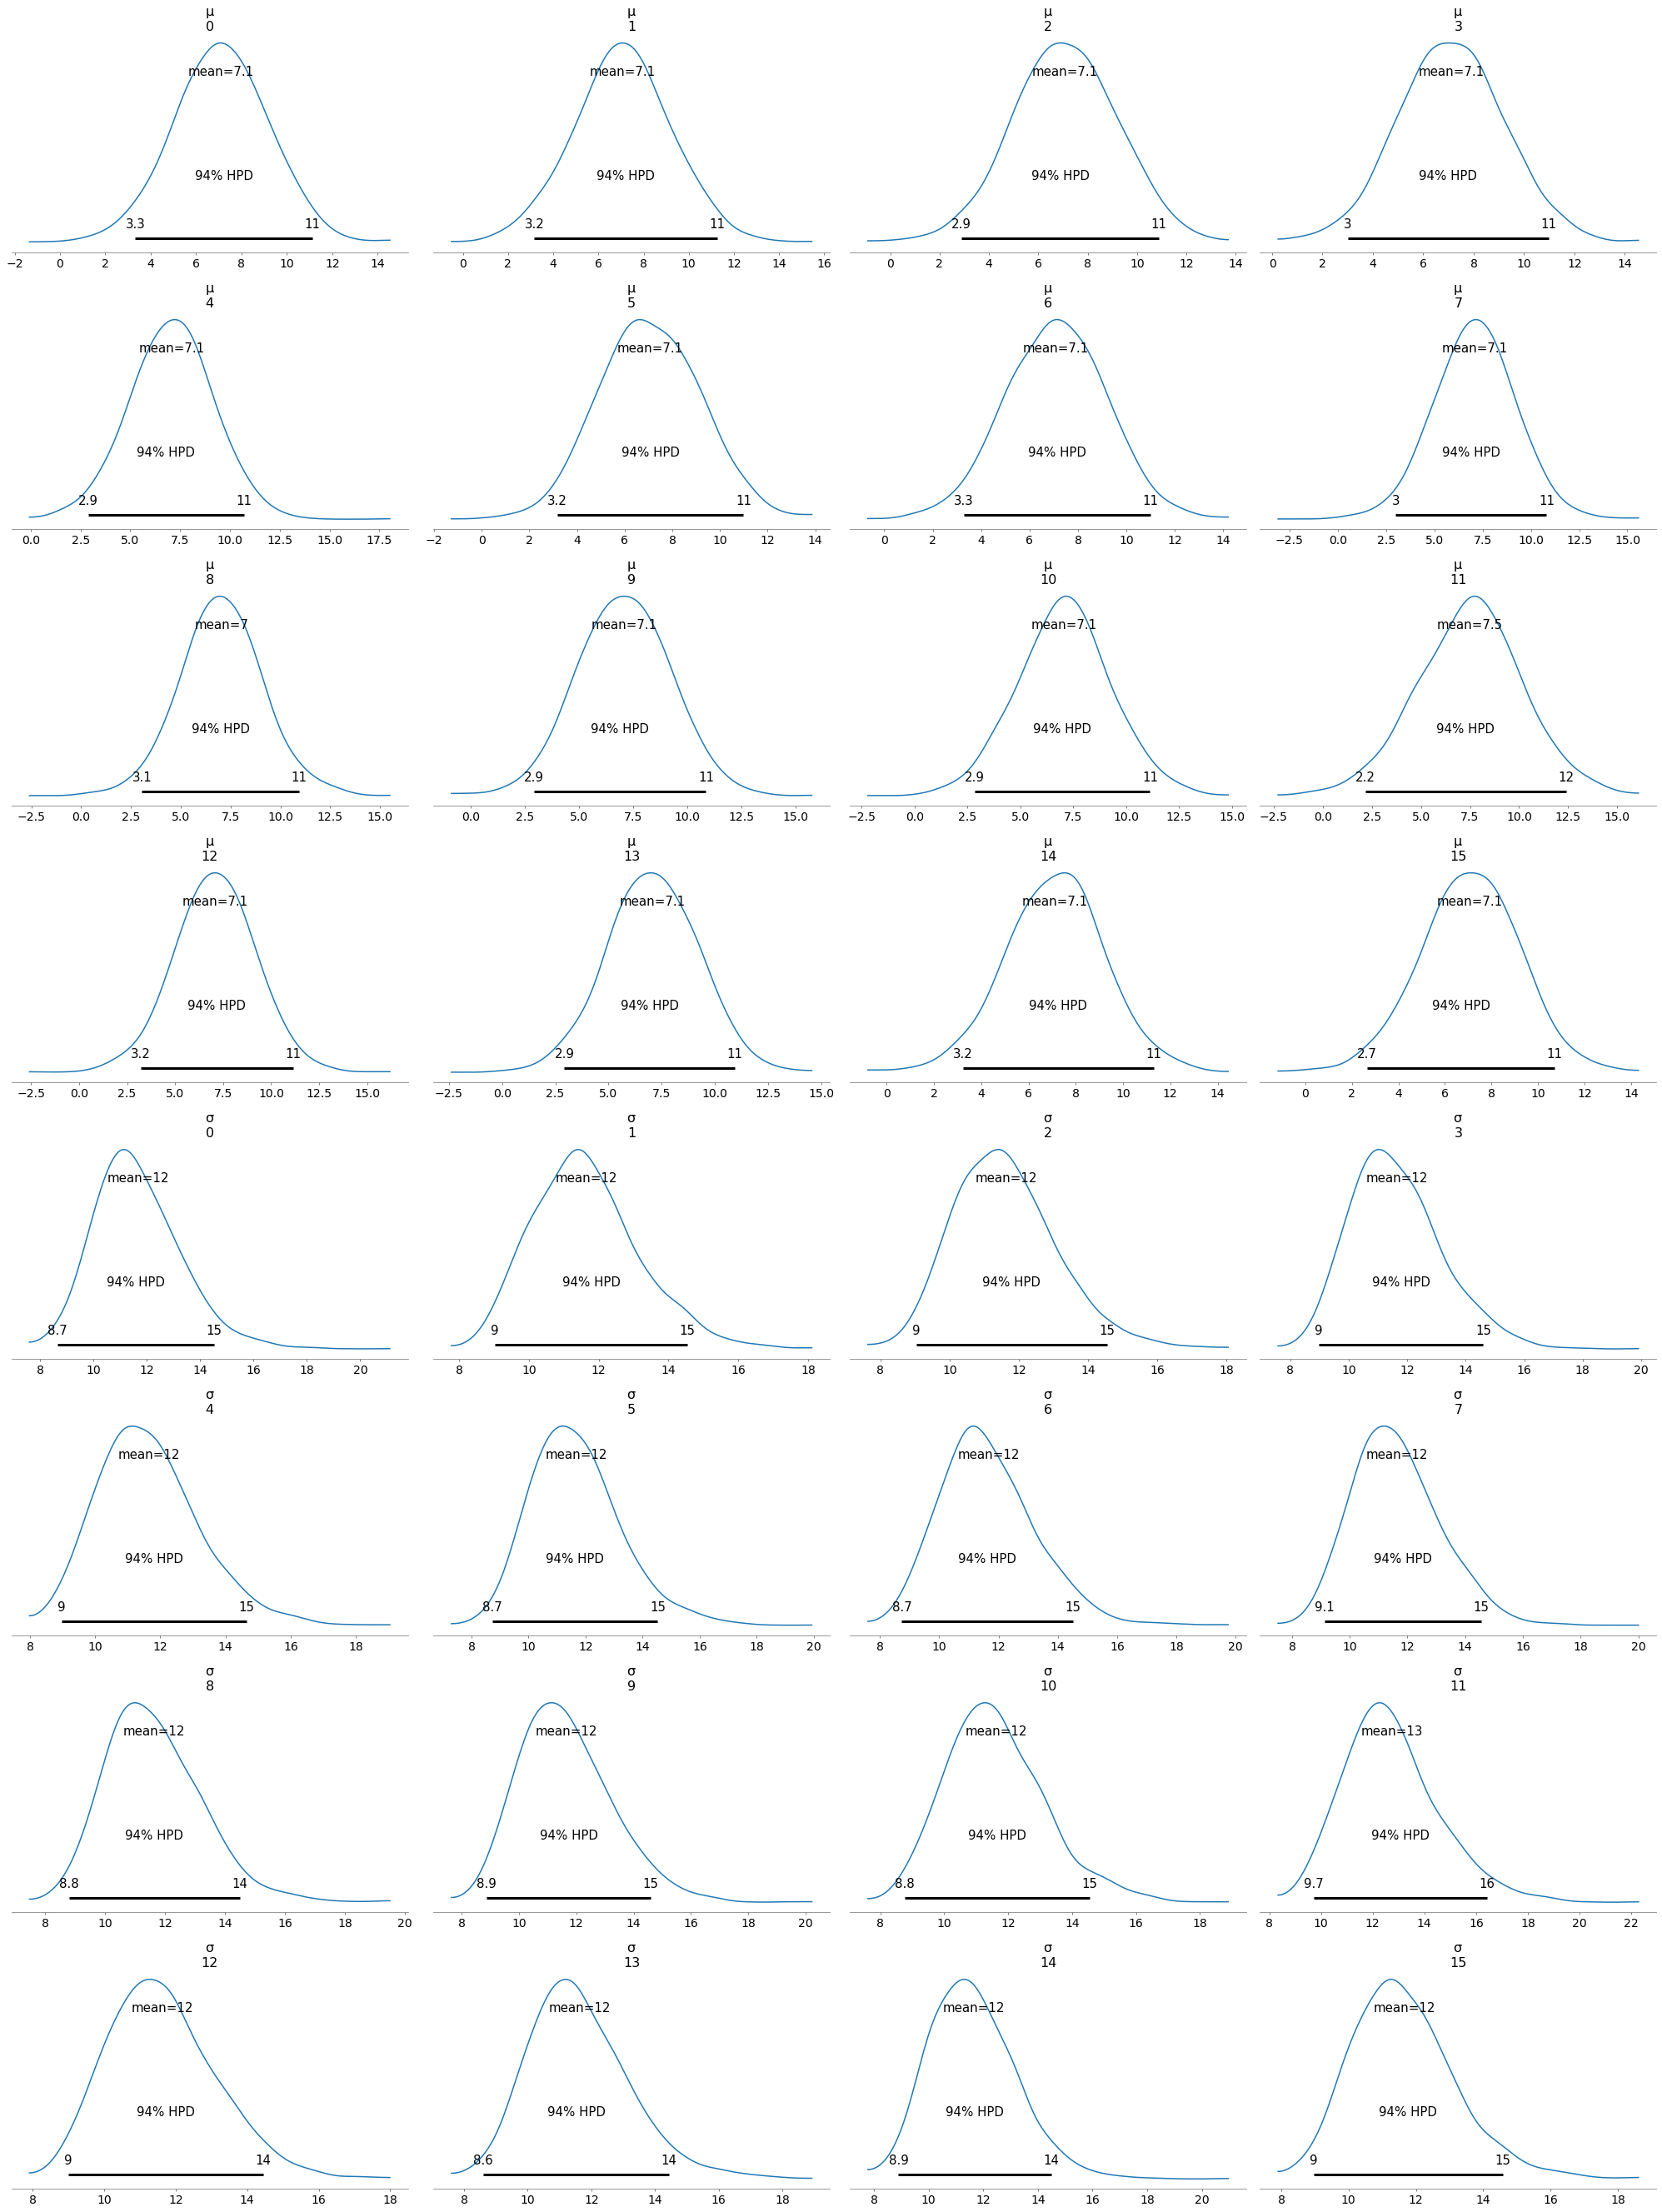

In [283]:
print(az.summary(trace_factors))
print(az.plot_posterior(trace_factors))
print(pm.rhat(trace_factors))

In [284]:
gdp_data_pct

,Manufacturing,Public Administration,Real Estate,Restaurants & Hotels,Retail Trade,Utilities,Wholesale Trade,Public Services,Agriculture,Construction,Education,Financial Services,Healthcare,Oil & Gas,GDP (GVA Sum),GDP (SAR bn),Real GDP (SAR bn)
7,2.059285,6.545948,3.169354,7.134071,7.222573,2.921130,7.222573,6.549741,3.038471,-0.145560,6.535471,3.531828,6.532861,-1.146764,2.809608,4.601222,inf
8,1.927253,1.792998,-3.352478,11.366246,11.351139,5.203406,11.351139,1.794336,0.975030,2.024619,1.801596,3.808013,1.810122,3.175958,2.824342,-11.442730,2.893370
9,2.982690,0.918274,3.786622,8.556701,8.483245,8.812950,8.483245,0.914964,2.260951,-2.413081,0.918459,7.718762,0.907112,-8.449658,-1.203337,10.179684,-3.763402
10,4.430653,2.994458,15.725699,-0.949668,-0.926679,20.826446,-0.926679,2.997558,3.915246,6.669920,2.996670,5.285562,2.984538,7.252926,5.179586,17.188840,5.625580
11,3.004540,2.313067,1.990565,4.793864,4.808008,4.172367,4.808008,2.317476,0.576241,1.021809,2.306034,4.885445,2.339385,-4.184941,0.447050,-2.836720,-1.210894
12,1.923231,2.409922,2.459386,3.842635,3.820260,4.136573,3.820260,2.408962,1.278096,2.536232,2.401517,6.553164,2.388263,-7.689186,-0.521317,2.968777,-2.819478
13,7.901565,2.613828,2.202158,3.348018,3.378073,8.890290,3.378073,2.606042,0.805048,4.534747,2.612631,4.733193,2.632456,18.076115,7.694184,13.819583,11.242547
14,12.299621,2.181221,7.692308,21.739130,21.765135,9.554140,21.765135,2.182268,3.582992,8.901408,2.185245,18.681635,2.175325,6.833133,7.556021,19.894227,7.958519
15,6.546847,3.340887,5.732293,13.795518,13.741464,4.069767,13.741464,3.342491,1.062721,7.941024,3.335295,16.080524,3.336511,4.264054,5.675747,26.846890,5.573852
16,7.526947,1.888795,5.913521,16.430769,16.463029,4.773997,16.463029,1.886195,1.010309,8.650851,1.898614,16.360217,1.875769,-1.558234,4.034728,14.683491,2.787968


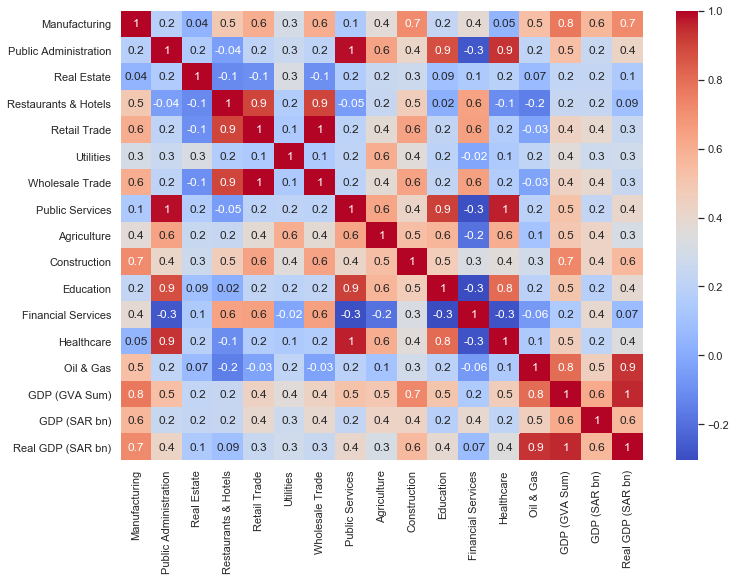

In [286]:
sns.set(rc = {'figure.figsize' : (11.7, 8.27)})
corr = gdp_data_pct.corr()
corr_map = sns.heatmap(corr, annot = True, 
                       fmt = ".1g", cmap = "coolwarm")

In [39]:
list1 = gdp_pct2["pct"].values
mx=max(list1[0],list1[1])  
secondmax=min(list1[0],list1[1])  
n =len(list1) 
for i in range(2,n):  
    if list1[i]>mx:  
        secondmax=mx 
        mx=list1[i]  
    elif list1[i]>secondmax and mx != list1[i]:  
        secondmax=list1[i] 
    else: 
        if secondmax == mx: 
            secondmax = list1[i] 
print("Second highest number is : ",str(secondmax)) 
print(secondmax)
print(max(list1))
gdp_pct2.pct[np.isinf(gdp_pct2.pct)] = secondmax

Second highest number is :  25.990207943668175
25.990207943668175
inf


C:\Users\fmuhammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\fmuhammad\Anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [41]:
with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=100)
    sigma_b = pm.HalfNormal('sigma_b', 5.)
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=factors)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=factors)

    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    gdp_hat = a[indices] + b[indices] * gdp_pct2.pct.values

    # Data likelihood
    gdp_like = pm.Normal('gdp_like', mu=gdp_hat,
                           sigma=eps, observed=real_gdp)

In [42]:
with hierarchical_model:
    hier_trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps, b, a, sigma_b, mu_b, sigma_a, mu_a]
Sampling 2 chains, 199 divergences: 100%|█████████████████████████████████████| 4000/4000 [2:00:40<00:00,  1.81s/draws]
There were 108 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7024942252788184, but should be close to 0.8. Try to increase the number of tuning steps.
There were 91 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6841806370091585, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


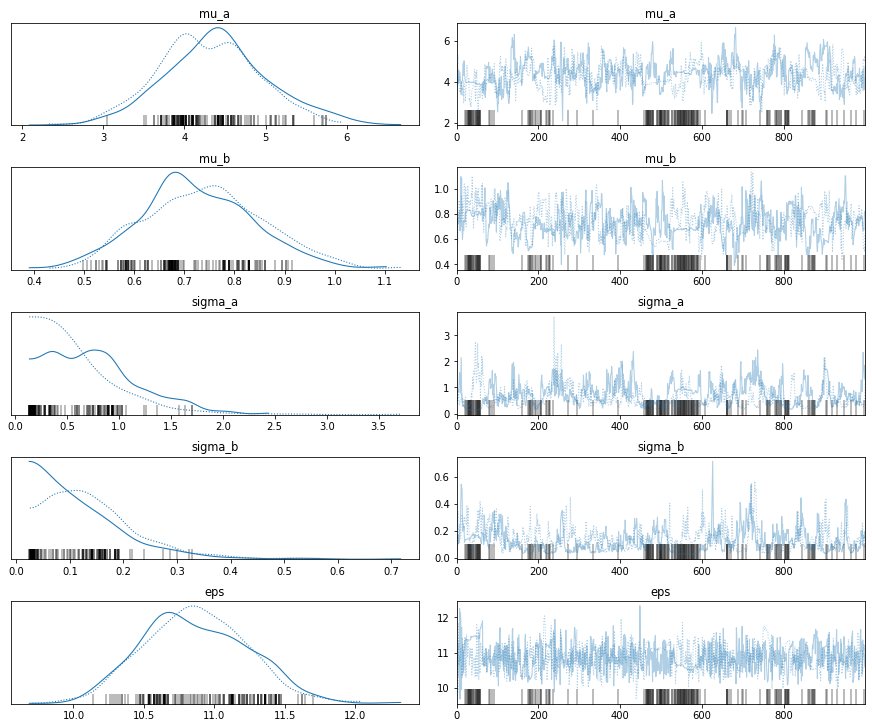

In [43]:
pm.traceplot(hier_trace,
             var_names=['mu_a', 'mu_b',
                        'sigma_a', 'sigma_b',
                        'eps'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF56E6F848>,
      dtype=object)

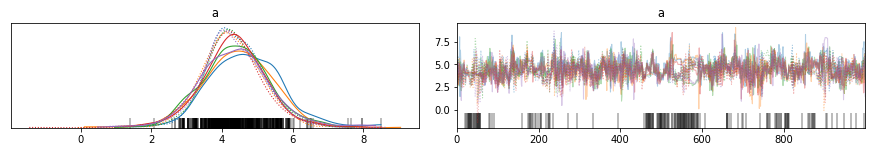

In [45]:
pm.traceplot(hier_trace,
             var_names=['a'], coords={'a_dim_0': range(5)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF582DDFC8>,
      dtype=object)

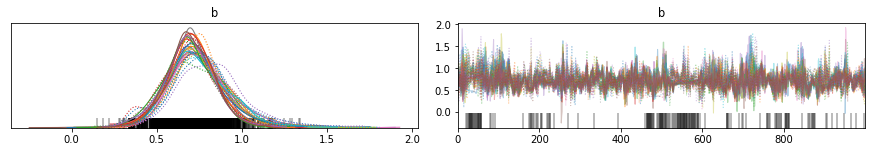

In [47]:
pm.traceplot(hier_trace,
             var_names=['b'], coords={'a_dim_0': range(5)})

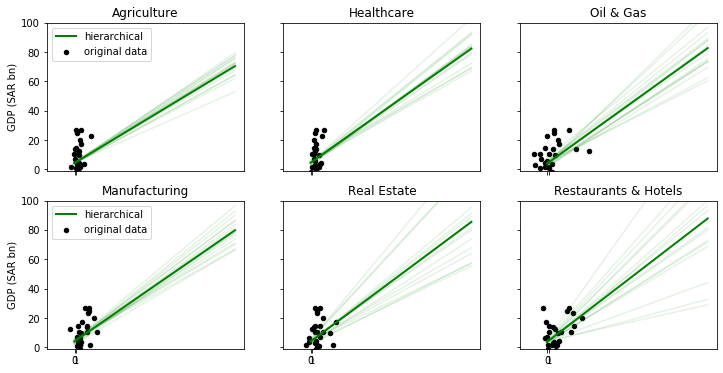

In [65]:
selection = ["Agriculture", "Healthcare", 'Oil & Gas', "Manufacturing", "Real Estate", 'Restaurants & Hotels']
cod = [0, 5, 7, 6, 10, 12]
fig, axis = plt.subplots(2, 3, figsize=(12, 6), sharey=True, sharex=True)
axis = axis.ravel()
for i, c in enumerate(selection):
    c_data = gdp_pct2[gdp_pct2.factor == c]
    c_data = c_data.reset_index(drop=True)
    c_index = np.where(gdp_pct2.factor.unique() == c)[0][0]
    z = cod[i]

    xvals = np.linspace(-0.2, 100)
    for a_val, b_val in zip(hier_trace['a'][z], hier_trace['b'][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.1)
    axis[i].plot(xvals, hier_trace['a'][z].mean() + hier_trace['b'][z].mean() * xvals,
                 'g', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data["pct"] + np.random.randn(len(c_data))*0.01, c_data["GDP (SAR bn)"],
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0, 1])
    axis[i].set_ylim(-1, 100)
    axis[i].set_title(c)
    if not i % 3:
        axis[i].legend()
        axis[i].set_ylabel('GDP (SAR bn)')

In [44]:
factor_eff = az.from_pymc3(trace=hier_trace)
fct_summary = az.summary(factor_eff)
fct_summary

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_a,4.347,0.631,3.084,5.517,0.052,0.037,149.0,149.0,149.0,400.0,1.01
mu_b,0.735,0.118,0.513,0.951,0.010,0.007,147.0,147.0,148.0,438.0,1.01
a[0],4.546,0.929,2.974,6.415,0.064,0.046,208.0,208.0,205.0,565.0,1.02
a[1],4.341,0.927,2.684,6.020,0.065,0.047,206.0,195.0,202.0,584.0,1.01
a[2],4.389,0.896,2.652,6.007,0.059,0.041,234.0,234.0,223.0,341.0,1.01
a[3],4.276,0.898,2.586,5.927,0.057,0.041,245.0,245.0,236.0,583.0,1.01
a[4],4.341,0.961,2.485,6.120,0.060,0.043,254.0,247.0,242.0,432.0,1.01
a[5],4.485,0.945,2.783,6.244,0.063,0.045,225.0,217.0,222.0,439.0,1.02
a[6],4.249,0.917,2.732,6.179,0.059,0.042,245.0,243.0,238.0,677.0,1.00
a[7],4.566,0.911,3.038,6.436,0.071,0.052,165.0,157.0,201.0,609.0,1.03


In [46]:
pprint(dict(zip(gdp_pct2.factor, indices)))

{'Agriculture': 0,
 'Construction': 1,
 'Education': 2,
 'Financial Services': 3,
 'GDP (GVA Sum)': 4,
 'Healthcare': 5,
 'Manufacturing': 6,
 'Oil & Gas': 7,
 'Public Administration': 8,
 'Public Services': 9,
 'Real Estate': 10,
 'Real GDP (SAR bn)': 11,
 'Restaurants & Hotels': 12,
 'Retail Trade': 13,
 'Utilities': 14,
 'Wholesale Trade': 15}


In [48]:
fct_summary.to_excel("sectors_coeff.xlsx")